In [80]:
from sklearn.datasets import load_iris
import torch

In [81]:
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [82]:
torch.tensor([[1,2],[2,4]])

tensor([[1, 2],
        [2, 4]])

In [83]:
class LogisticRegressionModel(nn.Module):
    def __init__(self,input_dim):
        super(LogisticRegressionModel,self).__init__()
        self.linear=nn.Linear(input_dim,1)

    def forward(self,x):
        logits=self.linear(x)
        prediction=torch.sigmoid(logits)
        return prediction

In [84]:
iris = load_iris()
X = iris.data
y = (iris.target == 0).astype(float) 

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

In [70]:
model = LogisticRegressionModel(input_dim=4)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [71]:
epochs = 100
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

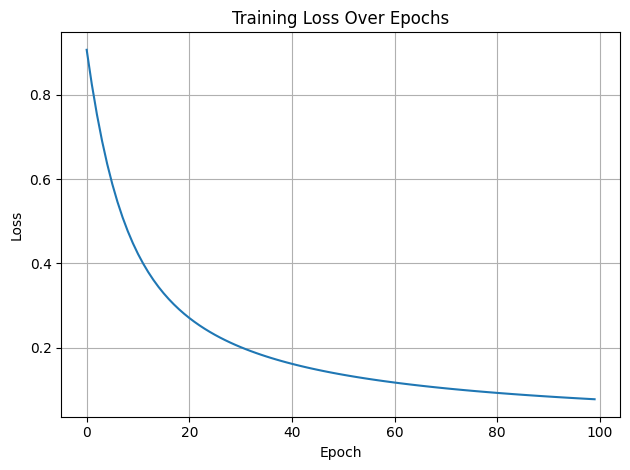

In [72]:
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

In [73]:
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    predictions = (test_outputs >= 0.5).float()
    accuracy = (predictions.eq(y_test_tensor).sum() / y_test_tensor.shape[0]).item()

print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 1.00
